In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load and preprocess the dataset (Manual Cleaning)
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_manual = df.copy()
df_manual = df_manual[df_manual['Pregnancies'] <= 13]
df_manual = df_manual[df_manual['Glucose'] != 0]
df_manual = df_manual[df_manual['BloodPressure'] >= 40]
df_manual = df_manual[(df_manual['SkinThickness'] != 0) & (df_manual['SkinThickness'] != 99)]
df_manual = df_manual[(df_manual['Insulin'] != 0) & (df_manual['Insulin'] <= 500)]
df_manual = df_manual[(df_manual['BMI'] != 0) & (df_manual['BMI'] < 53.2)]
df_manual = df_manual[(df_manual['DiabetesPedigreeFunction'] >= 0.1) & (df_manual['DiabetesPedigreeFunction'] <= 2.0)]

In [ ]:
# Select top features based on correlation
corr = df_manual.corr()['Outcome'].abs().sort_values(ascending=False)
top_features = corr[1:6].index.tolist()  # Top 5 features excluding Outcome
X = df_manual[top_features]
y = df_manual['Outcome']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
# Train model with best parameters
model = LogisticRegression(C=0.1, class_weight=None, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

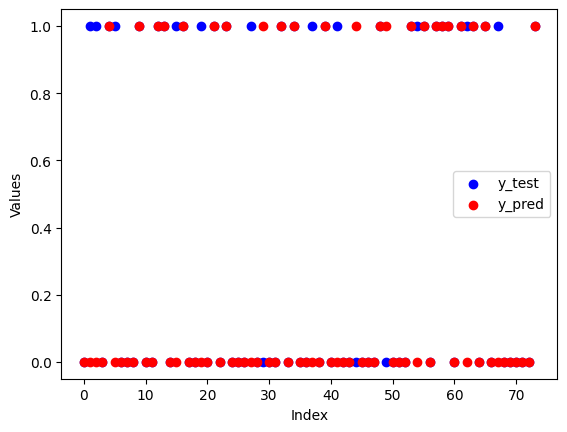

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test, color='blue', label='y_test')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='y_pred')

plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        43
           1       0.87      0.65      0.74        31

    accuracy                           0.81        74
   macro avg       0.83      0.79      0.80        74
weighted avg       0.82      0.81      0.80        74



In [ ]:
# Save model and scaler to pickle files
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)